# Loading the Libraris

In [23]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, ReLU
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers
from keras.metrics import categorical_crossentropy
from tensorflow.keras import Model, Input
from tensorflow.keras import utils
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Data


In [12]:
x1 = pd.read_csv('1.csv')
x2 = pd.read_csv('2.csv')
x3 = pd.read_csv('3.csv')
x4 = pd.read_csv('4.csv')

In [7]:
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

(1338, 43)
(1053, 43)
(999, 43)
(1401, 43)


In [ ]:
x1.pop('Unnamed: 0')
x2.pop('Unnamed: 0')
x3.pop('Unnamed: 0')
x4.pop('Unnamed: 0')

In [14]:
y1 = []
y2 = []
y3 = []
y4 = []

In [15]:
for i in range(1338):
  z = [0,0,0,1]
  y1.append(z)
for i in range(1053):
  z = [0,0,1,0]
  y2.append(z)
for i in range(999):
  z = [0,1,0,0]
  y3.append(z)
for i in range(1401):
  z = [1,0,0,0]
  y4.append(z)

In [18]:
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)

In [22]:
x = np.concatenate((x1,x2,x3,x4),axis=0)

In [21]:
y = np.concatenate((y1,y2,y3,y4),axis=0)

In [24]:
x , y = shuffle(x,y)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Network

In [26]:
model = tf.keras.models.Sequential()
model.add(Flatten())
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=64, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(4, activation='softmax'))

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=['categorical_crossentropy'], metrics=['accuracy'])

In [34]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath='model.hdf5', save_best_only=True, monitor='loss')
callbacks = [checkpointer]

In [28]:
history = model.fit(x_train, y_train, epochs=500, callbacks=[callbacks], verbose=1)

Epoch 1/500
120/120 [==============================] - 4s 5ms/step - loss: 0.4412 - accuracy: 0.8661
Epoch 2/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0747 - accuracy: 0.9890
Epoch 3/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0415 - accuracy: 0.9930
Epoch 4/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0262 - accuracy: 0.9953
Epoch 5/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0173 - accuracy: 0.9971
Epoch 6/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0193 - accuracy: 0.9950
Epoch 7/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0154 - accuracy: 0.9969
Epoch 8/500
120/120 [==============================] - 1s 4ms/step - loss: 0.0085 - accuracy: 0.9995
Epoch 9/500
120/120 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9971
Epoch 10/500
120/120 [==============================] - 1s 4ms/step - loss: 0.0073 - accura

# Evaluation

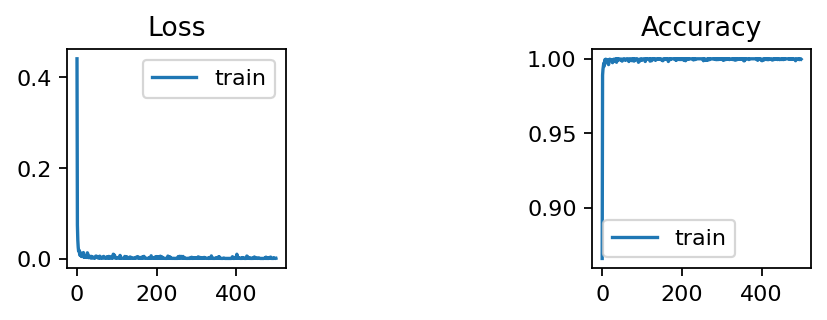

In [29]:
plt.figure( dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()

plt.show()

In [30]:
y_hat = model.predict(x_test)

30/30 [==============================] - 0s 2ms/step


In [31]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  1.0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Confusion Matrix: 



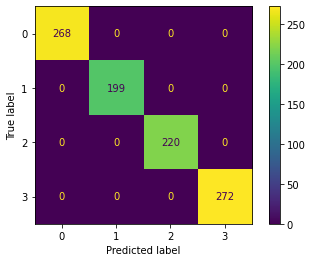

In [32]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()